Here, we will consider a different problem, namely the binary (or two-class) classification problem
in machine learning. The problem is of the following form. For a data set 
$D$ = { ${(x_i,y_i)}$:$i=1,2,...,n$}, we solve:

\begin{align}
\underset{w \in R^d}{\text{min}} f(w) = \frac{1}{2}\lambda||w||_2^2 + \frac{1}{n} \sum_{i = 1}^{n}L(y_i, w^\top x_i) 
\end{align}
Let $z = y_iw^Tx_i$  \\

$L_h(z) = \text{max}\{0,1 - z\}$  (hinge)

$L_l(z) = \text{log}(1 + exp(-z))$  (logistic)

$L_{sh}(z) = (\text{max}\{0,1 - z\})^2$  (squared hinge)


In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

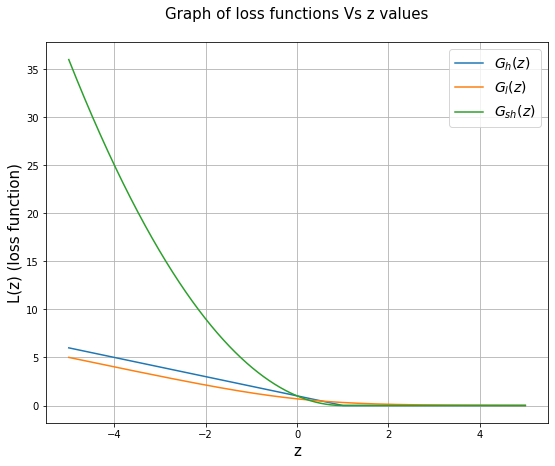

In [7]:
plt.figure(figsize=(9,7))
z_values = np.linspace(-5, 5, 1000)
G_h = [max(0, 1-z) for z in z_values]
G_l = [math.log(1 + math.exp(-z)) for z in z_values]
G_sh = [(max(0, 1-z))**2 for z in z_values]

plt.plot(z_values, G_h ,label=r'$ $')
plt.plot(z_values, G_l,label= r'$ $')
plt.plot(z_values, G_sh,label= r'$ $')
plt.grid()

plt.title('Graph of loss functions Vs z values\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$G_h(z)$", "$G_l(z)$", "$G_{sh}(z)$"],fontsize=14)
plt.show()

In [8]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)
A = iris.data

#check the shape of iris target
print(iris.target.shape)
print(iris.target)

n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points

y = 1.0*np.ones([A.shape[0],1])

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


$\textbf{Ans(a).}$  Now we have see that  number of classes C = 3 and the class label values in iris data are 0, 1, 2. Therefore the class labels are from the set {$0$, $1$, . . . , $C − 1$}.

$\textbf{Ans(b) and (c)}$ 

In [9]:
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1

#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices

train_data = []
train_label = []
test_data = []
test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count = count + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

$\textbf{Ans(d).}$ The prediction rule in eqn. (2). Use the
following code template:

In [10]:
def predict(w,x):
  h = np.matmul(w.T, x)
  if h > 0:
    return 1
  elif  h < 0:
    return -1

$\textbf{Ans(e).}$The accuracy on the data. (Use the predict function).

In [11]:
def compute_accuracy(data,labels,model_w):
  c = 0
  n = len(data[0])
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      c = c + 1
  return c/n 